In [119]:
"""
This notebook investigates the K-means clustering algorithm
and its application in image compression
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import scipy.io as sio
from PIL import Image

sns.set_context('notebook')
sns.set_style('white')
#plt.style.use('fivethirtyeight')
plt.xkcd() # because why not?
np.set_printoptions(precision=3)

In [120]:
def makeColormap():
    """Concatenates multiple colormaps"""
    colormap = list(cm.get_cmap('Accent').colors)
    colormap.extend(cm.get_cmap('Set1').colors)
    colormap.extend(cm.get_cmap('Set3').colors)
    return colormap

In [121]:
data = sio.loadmat('ex7data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [122]:
X = data['X']
m, n = X.shape

centroids_init = np.array([[3, 3], [6, 2], [8, 5]])
K = len(centroids_init) # Number of centroids

In [123]:
def plotData(X, idx, K):
    """Plots data grouped in K categories with different colors"""
    colormap = makeColormap()
    for i in range(K):
        X_plt = X[idx == i]
        plt.scatter(X_plt[:, 0], X_plt[:, 1], marker='o',
                                              lw=1,
                                              facecolors='none',
                                              edgecolors=colormap[i])

In [124]:
def initCentroids(X, K):
    """Randomly initializes centroids"""
    m, n = X.shape
    idx = np.random.choice(m, size=K, replace=False)
    return X[idx]

def findClosestCentroids(X, centroids):
    """Calculates the closest centroid to the particular datapoint"""
    m = X.shape[0]
    K = centroids.shape[0]
    dist = np.zeros((m, K))
    for i in range(K):
        dist[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    return np.argmin(dist, axis=1)

def computeCentroids(X, idx, K):
    """Moves the centroid to the average distance between category datapoints"""
    idx_mat = (idx.reshape(X.shape[0], 1) == np.arange(K))
    return (idx_mat.T @ X) / np.sum(idx_mat, axis=0).reshape((K, 1))

In [125]:
def KMeans(X, centroids_init, max_iters, plot=True):
    """Runs the K-Means algorithm, [plots centroids' path]"""
    if plot: 
        plt.figure(figsize=(10, 6))
        colormap = makeColormap()
        centroids_hist = centroids_init
    m, n = X.shape
    K = len(centroids_init)
    centroids = centroids_init

    for i in range(max_iters):
        print('Running K-Means iteration {} / {}'.format(i+1, max_iters), end='\r')
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        
        if plot:
            centroids_hist = np.append(centroids_hist, centroids, axis=0)

    if plot:
        plotData(X, idx, K)
        # Plot Lines
        for i in range(K):
            mu = centroids_hist[i:-1:K]
            plt.plot(mu[:, 0], mu[:, 1], color=colormap[i], lw=0.5)

        plt.scatter(centroids_hist[:, 0], centroids_hist[:, 1], marker='x', color='k') 
        plt.show()
    return centroids, idx

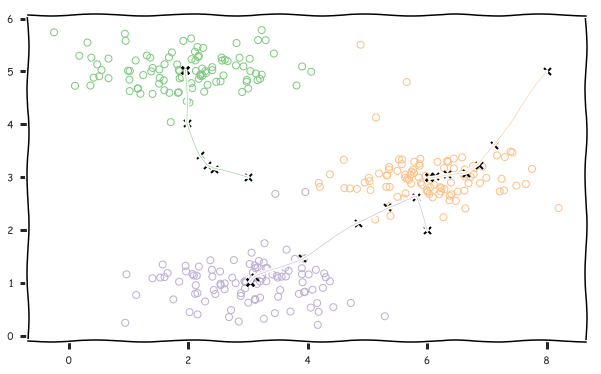

In [126]:
centroids, idx = KMeans(X, centroids_init, max_iters=10)

In [129]:
# Load image
img = Image.open('bird_small.png')
img.load()
img = np.asarray(img, dtype=np.uint64)

# rescale so that images are in range 0-1
img = img / 255

X = np.reshape(img, (img.shape[0] * img.shape[1], 3))
K = 16
centroids_init = initCentroids(X, K)

centroids, idx = KMeans(X, centroids_init, max_iters=10, plot=False)

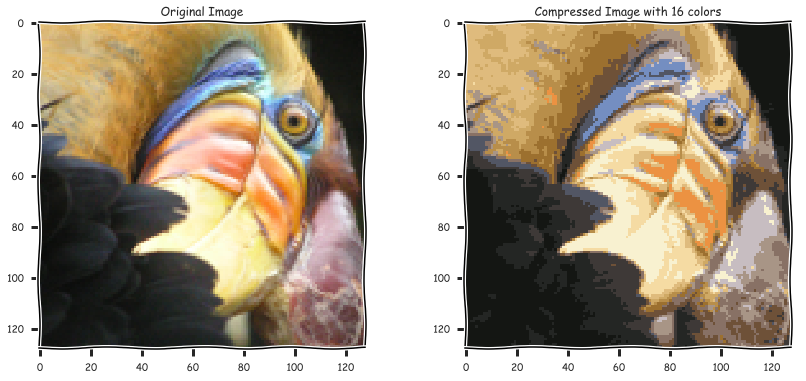

In [131]:
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx, :]
X_recovered = X_recovered.reshape(img.shape)

fig = plt.figure(figsize=(14, 6))

fig.add_subplot(121)
plt.imshow(img)
plt.title('Original Image')

fig.add_subplot(122)
plt.imshow(X_recovered)
plt.title('Compressed Image with 16 colors')